# CLASSIFYING SMS INTO SPAM AND HAM

In [1]:
#Loading dataset
import pandas as pd
data = pd.read_csv("spam.csv",encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

data = data.rename(columns={"v1":"label", "v2":"text"})
data.head(20)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [2]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [3]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='label', ylabel='count'>

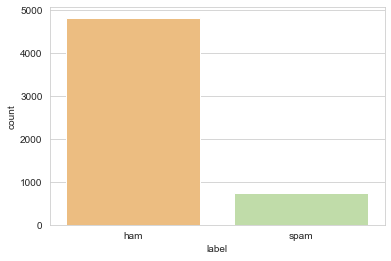

In [4]:
#data['label'].value_counts().plot.bar()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")
sns.countplot(x='label',data=data,palette="Spectral")

In [5]:
#add feature spam to the dataframe
data['spam']=data['label'].map({'spam':1,'ham':0}).astype(int)
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
#add feature length of text to the dataframe
data['length']=data['text'].apply(len)
data.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


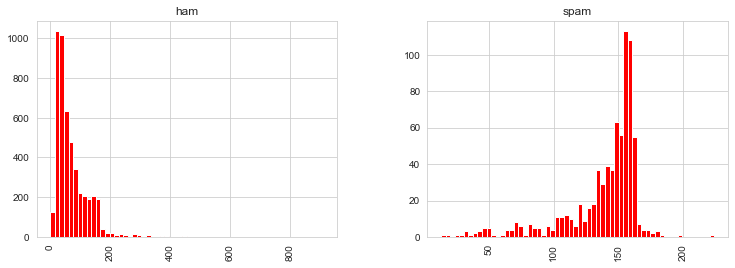

In [7]:
data.hist(column='length',by='label',bins=60,figsize=(12,4),color='r');


## Word Cloud

In [8]:
data_spam=data[data['spam']==1].copy()
data_ham=data[data['spam']==0].copy()
data_ham

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,ham,Even my brother is not like to speak with me. ...,0,77
...,...,...,...,...
5565,ham,Huh y lei...,0,12
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


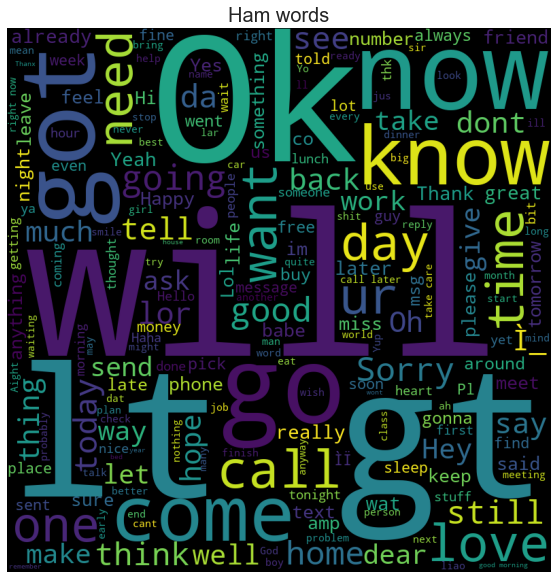

In [9]:
from wordcloud import WordCloud, STOPWORDS 
def word_cloud(spam_or_ham,title):
    text = ' '.join(spam_or_ham['text'].astype(str).tolist())
    stopwords=set(STOPWORDS)
    wordclouds = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
    plt.figure(figsize=(12,10),frameon=True)
    plt.imshow(wordclouds)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

word_cloud(data_ham,"Ham words")

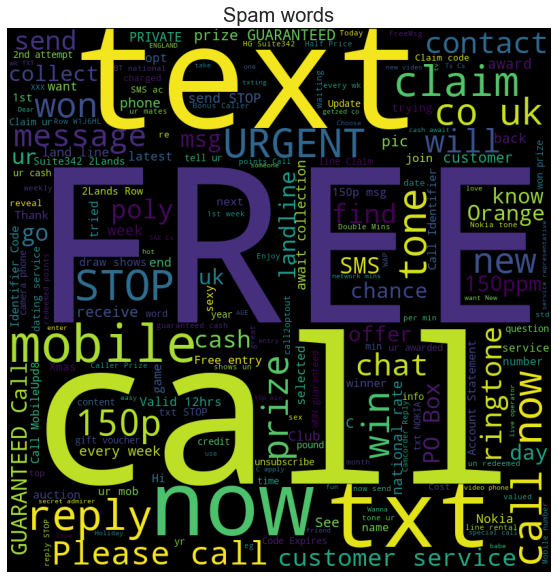

In [10]:
word_cloud(data_spam,"Spam words")

## removing stop words and punctuations

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# function for removing puctuation and stop words:
def punc_and_stopwords_remove(sms):
    no_punc="".join([c for c in sms if c not in string.punctuation ]).split()
    sms_no_punc_no_stopwords = [word.lower() for word in no_punc if word.lower() not in stopwords.words("english")]
    return sms_no_punc_no_stopwords

data['text'].apply(punc_and_stopwords_remove).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [14]:
#bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(analyzer=punc_and_stopwords_remove).fit(data['text'])

In [15]:
print(len(bow.vocabulary_))

9431


In [16]:
bow_data=bow.transform(data['text'])

In [17]:
bow_data.shape

(5572, 9431)

In [18]:
#number of non zero values nnz
bow_data.nnz

49772

In [19]:
# number of none zero entries divided by matrix size.
# Around 10 % is non zero values in the matrix
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.09471444959776236


## Term frequency inverse document frequency - TFIDF

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [21]:
data_tfidf = tfidf_transformer.transform(bow_data)

In [22]:
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [23]:
import numpy as np
np.shape(data_tfidf)

(5572, 9431)

In [24]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, data["spam"], test_size=0.3, random_state=5)

In [25]:
data_tfidf_train

<3900x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 35125 stored elements in Compressed Sparse Row format>

In [26]:
data_tfidf_test

<1672x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 14647 stored elements in Compressed Sparse Row format>

In [27]:
#for TFIDF matrix and feature "length"
from scipy.sparse import  hstack
X = hstack((data_tfidf ,np.array(data['length'])[:,None])).A

In [28]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, data["spam"], test_size=0.25, random_state=5)

## Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classifiers 

### 1.NB Classifier

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB().fit(X_train, y_train)
pred_MNB = model_MNB.predict(X_test)
acc_MNB = accuracy_score(y_test, pred_MNB)
print(acc_MNB)


0.9770279971284996


### 2.KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters_KNN = {'n_neighbors': (10,15,17), }
grid_search= GridSearchCV(KNeighborsClassifier(),parameters_KNN,cv=5, n_jobs=-1, verbose=1)
grid_search.fit(data_tfidf_train, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (10, 15, 17)}, verbose=1)

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_neighbors': 15}
0.9364102564102564


## test_train_split

In [33]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = \
    train_test_split(data["text"], data["spam"], test_size=0.3, random_state=5)

In [34]:
sms_train.head()

3507    Camera quite good, 10.1mega pixels, 3optical a...
1332            It's ok lar. U sleep early too... Nite...
4259        Are you plans with your family set in stone ?
1236                             How much are we getting?
2132    Your B4U voucher w/c 27/03 is MARSMS. Log onto...
Name: text, dtype: object

## Pipelines

### 1.MultinomialNB

In [35]:
from sklearn.pipeline import Pipeline
pipe_MNB = Pipeline([('bow'  , CountVectorizer(analyzer = punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_MNB' , MultinomialNB()),
                    ])



0.9665071770334929
0.9665071770334929
[[1465    0]
 [  56  151]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.73      0.84       207

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672



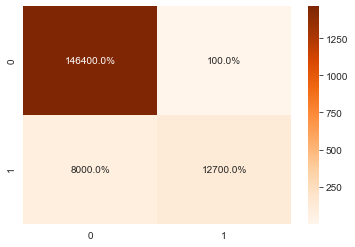

In [78]:
pipe_MNB.fit(X=sms_train, y=label_train)
pred_test_MNB = pipe_MNB.predict(sms_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB)
print(pipe_MNB.score(sms_test, label_test))
sns.heatmap(confusion_matrix(label_test,pred_test_grid_KNN), annot=True,fmt='0.001%', cmap='Oranges')
print(confusion_matrix(label_test,pred_test_MNB))
print(classification_report(label_test,pred_test_MNB))

## 2.KNN

In [37]:
#Pipeline with GridSearchCV optimize best model parameter: n_neighbors
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer = punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_KNN' , KNeighborsClassifier() )
                    ])

parameters_KNN = {'clf_KNN__n_neighbors': (8,15,20), }

grid_KNN = GridSearchCV(pipe_KNN, parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function punc_and_stopwords_remove at 0x0000008CFC3DE318>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_KNN', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'clf_KNN__n_neighbors': (8, 15, 20)},
             verbose=1)

In [38]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)


{'clf_KNN__n_neighbors': 15}
0.936923076923077


0.9515550239234449
0.9515550239234449
[[1464    1]
 [  80  127]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1465
           1       0.99      0.61      0.76       207

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.95      1672



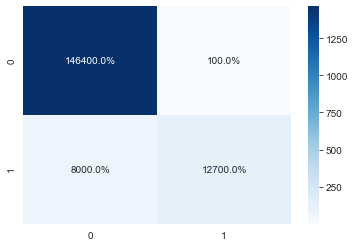

In [76]:
pred_test_grid_KNN = grid_KNN.predict(sms_test)
acc_KNN = accuracy_score(label_test, pred_test_grid_KNN)
print(acc_KNN)
print(grid_KNN.score(sms_test, label_test))
sns.heatmap(confusion_matrix(label_test,pred_test_grid_KNN), annot=True,fmt='0.001%', cmap='Blues')
print(confusion_matrix(label_test,pred_test_grid_KNN))
print(classification_report(label_test,pred_test_grid_KNN))


## 3.SVC

In [40]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([ ('bow'  , CountVectorizer(analyzer =punc_and_stopwords_remove) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(gamma='auto', C=1000)),
                    ])
parameters_SVC = dict(tfidf=[None, TfidfTransformer()],
                      clf_SVC__C=[500, 1000,1500]
                      )
grid_SVC = GridSearchCV(pipe_SVC, parameters_SVC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_SVC.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function punc_and_stopwords_remove at 0x0000008CFC3DE318>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_SVC', SVC(C=1000, gamma='auto'))]),
             n_jobs=-1,
             param_grid={'clf_SVC__C': [500, 1000, 1500],
                         'tfidf': [None, TfidfTransformer()]},
             verbose=1)

In [41]:
print(grid_SVC.best_params_)
print(grid_SVC.best_score_)

{'clf_SVC__C': 1500, 'tfidf': None}
0.976153846153846


In [42]:
pred_test_grid_SVC = grid_SVC.predict(sms_test)
acc_SVC = accuracy_score(label_test, pred_test_grid_SVC)
print(acc_SVC)
print(grid_SVC.score(sms_test, label_test))

0.9838516746411483
0.9838516746411483


[[1465    0]
 [  27  180]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       1.00      0.87      0.93       207

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



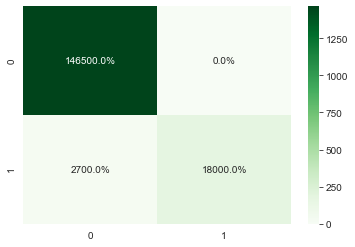

In [77]:
print(confusion_matrix(label_test,pred_test_grid_SVC))
sns.heatmap(confusion_matrix(label_test,pred_test_grid_SVC), annot=True,fmt='0.001%', cmap='Greens')
print(classification_report(label_test,pred_test_grid_SVC))